# scqubits example: zero-pi qubit
J. Koch and P. Groszkowski

For further documentation of scqubits see https://scqubits.readthedocs.io/en/latest/.

---

Set up Matplotlib for plotting into notebook, and import scqubits and numpy:

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

import numpy as np
import scqubits as scq

# $0$-$\pi$ qubit (decoupled from $\zeta$-mode)

Neglecting ground capacitances, the $0$-$\pi$ circuit has a pair of capacitors, a pair of linear inductors and a pair of Josephson junctions. The circuit has three modes: a transmon-like $\theta$-mode, a fluxonium-like $\phi$-mode and a spurious harmonic oscillator $\zeta$-mode. When the capacitor pairs and the linear inductor pairs are identical, the $\zeta$-mode is decoupled from the rest two. The Hamiltonian for the $0$-$\pi$ circuit decoupled from the $\zeta$-mode is
\begin{align*}
H_{\phi,\theta}&=-2E_\text{CJ}\partial_\phi^2+2E_{\text{C}\Sigma}(i\partial_\theta-n_g)^2-2E_\text{J}\cos\theta\cos(\phi-\varphi_\text{ext}/2)+E_L\phi^2+2E_\text{J} \\
&+2E_{C\Sigma}dC_J\,\partial_\phi\partial_\theta + E_J dE_J \sin\theta\sin(\phi-\phi_\text{ext}/2),
\end{align*}
where $\varphi_{\text{ext}} = 2\pi\Phi_{\text{ext}}/\Phi_0$ is the reduced external magnetic flux, $dC_J = 2(C_{J1} - C_{J2})/(C_{J1}+C_{J2})$ and $dE_J = 2(E_{J1} - E_{J2})/(E_{J1}+E_{J2})$

<br>

**Creation via GUI** (ipywidgets needs to be installed for this to work.)

In [2]:
zero_pi = scq.ZeroPi.create()

Output()

**Programmatic creation**

Diagonlization of $0$-$\pi$ proceeds in a hybrid basis, using charge basis for $\theta$ and discretization over an interval for $\phi$. (The latter explains the need for providing grid parameters.)

In [4]:
zero_pi = scq.ZeroPi(
    # reminder: the parameters for generating an 1D grid are (min_value, max_value, num_grid_points)
    grid = scq.Grid1d(-6*np.pi, 6*np.pi, 200), 
    EJ   = 10.0,
    EL   = 0.04,
    ECJ  = 20.0,
    EC = 0.04,
    ng   = 0.1,
    flux = 0.23,
    ncut = 30
)

In [5]:
print(zero_pi)

ZeroPi--------------| [ZeroPi_3]
                    | EJ: 10.0
                    | EL: 0.04
                    | ECJ: 20.0
                    | EC: 0.04
                    | dEJ: 0.0
                    | dCJ: 0.0
                    | ng: 0.1
                    | flux: 0.23
                    | ncut: 30
                    | truncated_dim: 6
                    |
                    | dim: 12200



Just like other qubits implemented in scqubits, parameters of $0$-$\pi$ can be modified by either assiging values to the corresponding attributes, or through modifying values in the above GUI.

In [11]:
zero_pi.flux = 0.31

An interesting alternative way to specify capacitive energies is to provide $E_{CJ}$ and $E_{C\Sigma}$ (corresponds to the optional argument `ECS`) during the initialization. The $E_C$ value can also be changed by providing $E_{C\Sigma}$ value in the following way:

In [10]:
zero_pi.set_EC_via_ECS(0.4)
zero_pi.EC

0.4081632653061224

## Computing and plotting eigenenergies and wavefunctions

**Eigenenergies.** Similar to other qubits, eigenvalue computations and parameter sweeps can be performed using following methods:

In [7]:
zero_pi.eigenvals(evals_count=10)

array([17.0014342 , 17.02182808, 18.1214257 , 18.13868249, 18.72196777,
       18.93031195, 19.16309846, 19.17777943, 19.92663351, 20.0898962 ])

Spectral data:   0%|          | 0/27 [00:00<?, ?it/s]

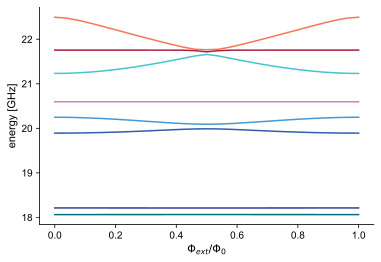

In [16]:
flux_list = np.linspace(0, 1, 27)
zero_pi.plot_evals_vs_paramvals('flux', flux_list, evals_count=8);

**Matrix elements.** Similar to other qubits, matrix elements can be obtained and visualized as follows:

In [13]:
zero_pi.matrixelement_table(operator="n_theta_operator",)

array([[-0.05922139,  0.00525573, -0.00173534, -0.00314021, -0.06151892,
        -0.05125716],
       [ 0.00525573, -0.15354172,  0.00527505, -0.0056875 ,  1.05065762,
         0.00665317],
       [-0.00173534,  0.00527505, -0.08639363, -0.02892699, -0.02009053,
         0.01284532],
       [-0.00314021, -0.0056875 , -0.02892699, -0.1198874 ,  0.01334359,
         0.00595058],
       [-0.06151892,  1.05065762, -0.02009053,  0.01334359,  0.13307501,
         0.03973421],
       [-0.05125716,  0.00665317,  0.01284532,  0.00595058,  0.03973421,
        -0.11209945]])

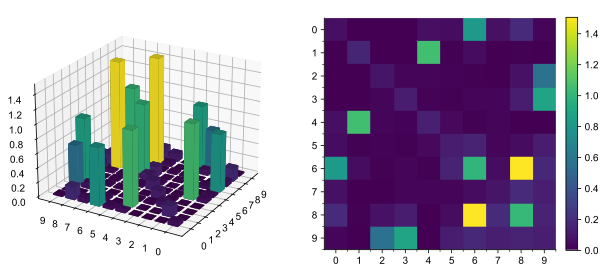

In [14]:
zero_pi.plot_matrixelements('n_theta_operator', evals_count=10);

In [15]:
zero_pi.plot_matelem_vs_paramvals('flux', flux_list, 'n_theta_operator', evals_count=10);

NameError: name 'flux_list' is not defined

**Plot wavefunctions.** 

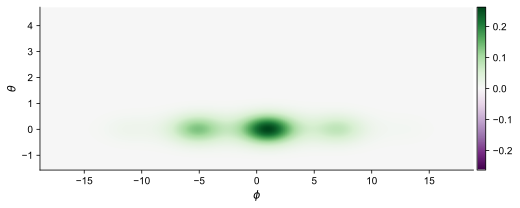

In [8]:
fig, ax = zero_pi.plot_wavefunction(which=0, mode='real', zero_calibrate=True);

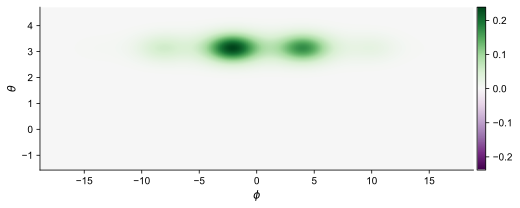

In [10]:
zero_pi.plot_wavefunction(which=1, mode='real', zero_calibrate=True);

**Visualizing potentials**

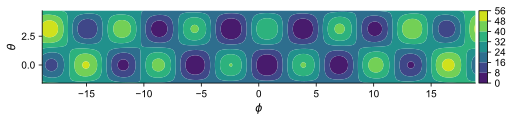

In [6]:
zero_pi.plot_potential();

# Full $0$-$\pi$ qubit (incl. $\zeta$-mode)

When the capacitor and/or the inductor pairs are not identifcal, the $\zeta$-mode couples to $\theta$ and/or $\phi$-mode. To accurately obtain spectral properties of such circuit, all three modes need to be taken into account. The full Hamiltonian is
\begin{align*}
H&= H_{\theta,\phi} + H_{\zeta} + H_{\text{int}}\\
H_{\zeta}&= \omega_\zeta a^\dagger a\\
H_{\text{int}}&= 2E_{\text C \Sigma } dC \partial_\theta \partial_\eta + E_{\text L} dE_{\text L} \phi\zeta 
\end{align*}
where $dC = 2(C_{1} - C_{2})/(C_{1}+C_{2})$ and $dL = 2(L_{1} - L_{2})/(L_{1}+L_{2})$.

<br>

**Creation via GUI** (ipywidgets needs to be installed for this to work.)

In [18]:
full_zpi = scq.FullZeroPi.create()

Output()

In [5]:
print(full_zpi)

FullZeroPi----------|
                    | EJ: 10.0
                    | EL: 0.04
                    | ECJ: 20.0
                    | EC: 0.04
                    | dEJ: 0.05
                    | dCJ: 0.05
                    | dC: 0.08
                    | dEL: 0.05
                    | ng: 0.1
                    | flux: 0.23
                    | ncut: 30
                    | zeropi_cutoff: 10
                    | zeta_cutoff: 40
                    | truncated_dim: 10
                    |
                    | dim: 400   --[ (theta, phi): 21960 total, 10 truncated;  (zeta): 40 ]--



Notice that four basis cutoffs need to be specified: `ncut`, `zeropi_cutoff`, `zeta_cutoff` and `grid`. The diagonalization of the full $0$-$\pi$ is carried out in the following way: the $H_{\theta,\phi}$ is diagonalized under the hybrid basis which are specified by `ncut` and `grid`. The lowest `zeropi_cutoff` energy eigenstates are then used to formulate a set of basis with the lowest `zeta_cutoff` energy eigenstates of $H_{\zeta}$, which describes a harmonic oscillator. Finally, the full Hamiltonian $H$ is represented under the composite basis and diagonalized.